In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Normalize concept type
CONCEPT_TYPE_TO_CANONICAL = {
    "food insecurity": "Food Insecurity",
    "Food_Insecurity": "Food Insecurity",
    "smoking": "Smoking Status",
    "Smoking_Status": "Smoking Status",
    "financial_strain": "Financial Strain",
    "Financial_Strain": "Financial Strain",
    "Social_Family_Support": "Social Family Support",
    "Transportation_Barrier": "Transportation Barrier",
    "Physical_Activity": "Physical Activity",
    "Insurance_Status": "Insurance Status",
    "Housing_Instability": "Housing Instability",
    "housing_instability": "Housing Instability",
    "Health_Literacy": "Health Literacy",
    "Health_literacy": "Health Literacy",
    "Supplies": "Supplies",
    "Employment_Status": "Employment Status",
    "Adverse_Childhood_Experience": "Adverse Childhood Experience",
    "Education_Level": "Education Level",
    "Home_and_Social_Environment": "Home and Social Environment",
    "no_emotional_support": "Social Family Support",
    "no_social_network": "Social Family Support",
    "emotional_support": "Social Family Support",
    "social_network": "Social Family Support",
    "social_isolation_general": "Social Family Support",
}

def normalize_concept_type(concept_type: str) -> str:
    """Map raw Concept Type to canonical SDoH category."""
    return CONCEPT_TYPE_TO_CANONICAL.get(concept_type, concept_type)

# Read error analysis results
df = pd.read_csv("../data/error_analysis/SDoH_Error.csv")
df = df[~df["Gold_Standard"].isna()]  # remove rows with no gold standard
df["Concept Type"] = df["Concept Type"].apply(normalize_concept_type)
df["Gold_Standard"] = df["Gold_Standard"].str.replace("_", " ")
sorted(set(df["Concept Type"].tolist()))

['Adverse Childhood Experience',
 'Education Level',
 'Employment Status',
 'Financial Strain',
 'Food Insecurity',
 'Health Literacy',
 'Home and Social Environment',
 'Housing Instability',
 'Insurance Status',
 'Physical Activity',
 'Smoking Status',
 'Social Family Support',
 'Supplies',
 'Transportation Barrier']

In [72]:
print(f"Total errors: {len(df)}")
print(f"Unique categories : {df["Concept Type"].nunique()}")
df["Concept Type"].value_counts()

Total errors: 201
Unique categories : 14


Concept Type
Food Insecurity                 47
Smoking Status                  44
Social Family Support           33
Financial Strain                23
Transportation Barrier          10
Physical Activity                9
Housing Instability              7
Insurance Status                 6
Health Literacy                  6
Employment Status                4
Supplies                         4
Adverse Childhood Experience     3
Education Level                  3
Home and Social Environment      2
Name: count, dtype: int64

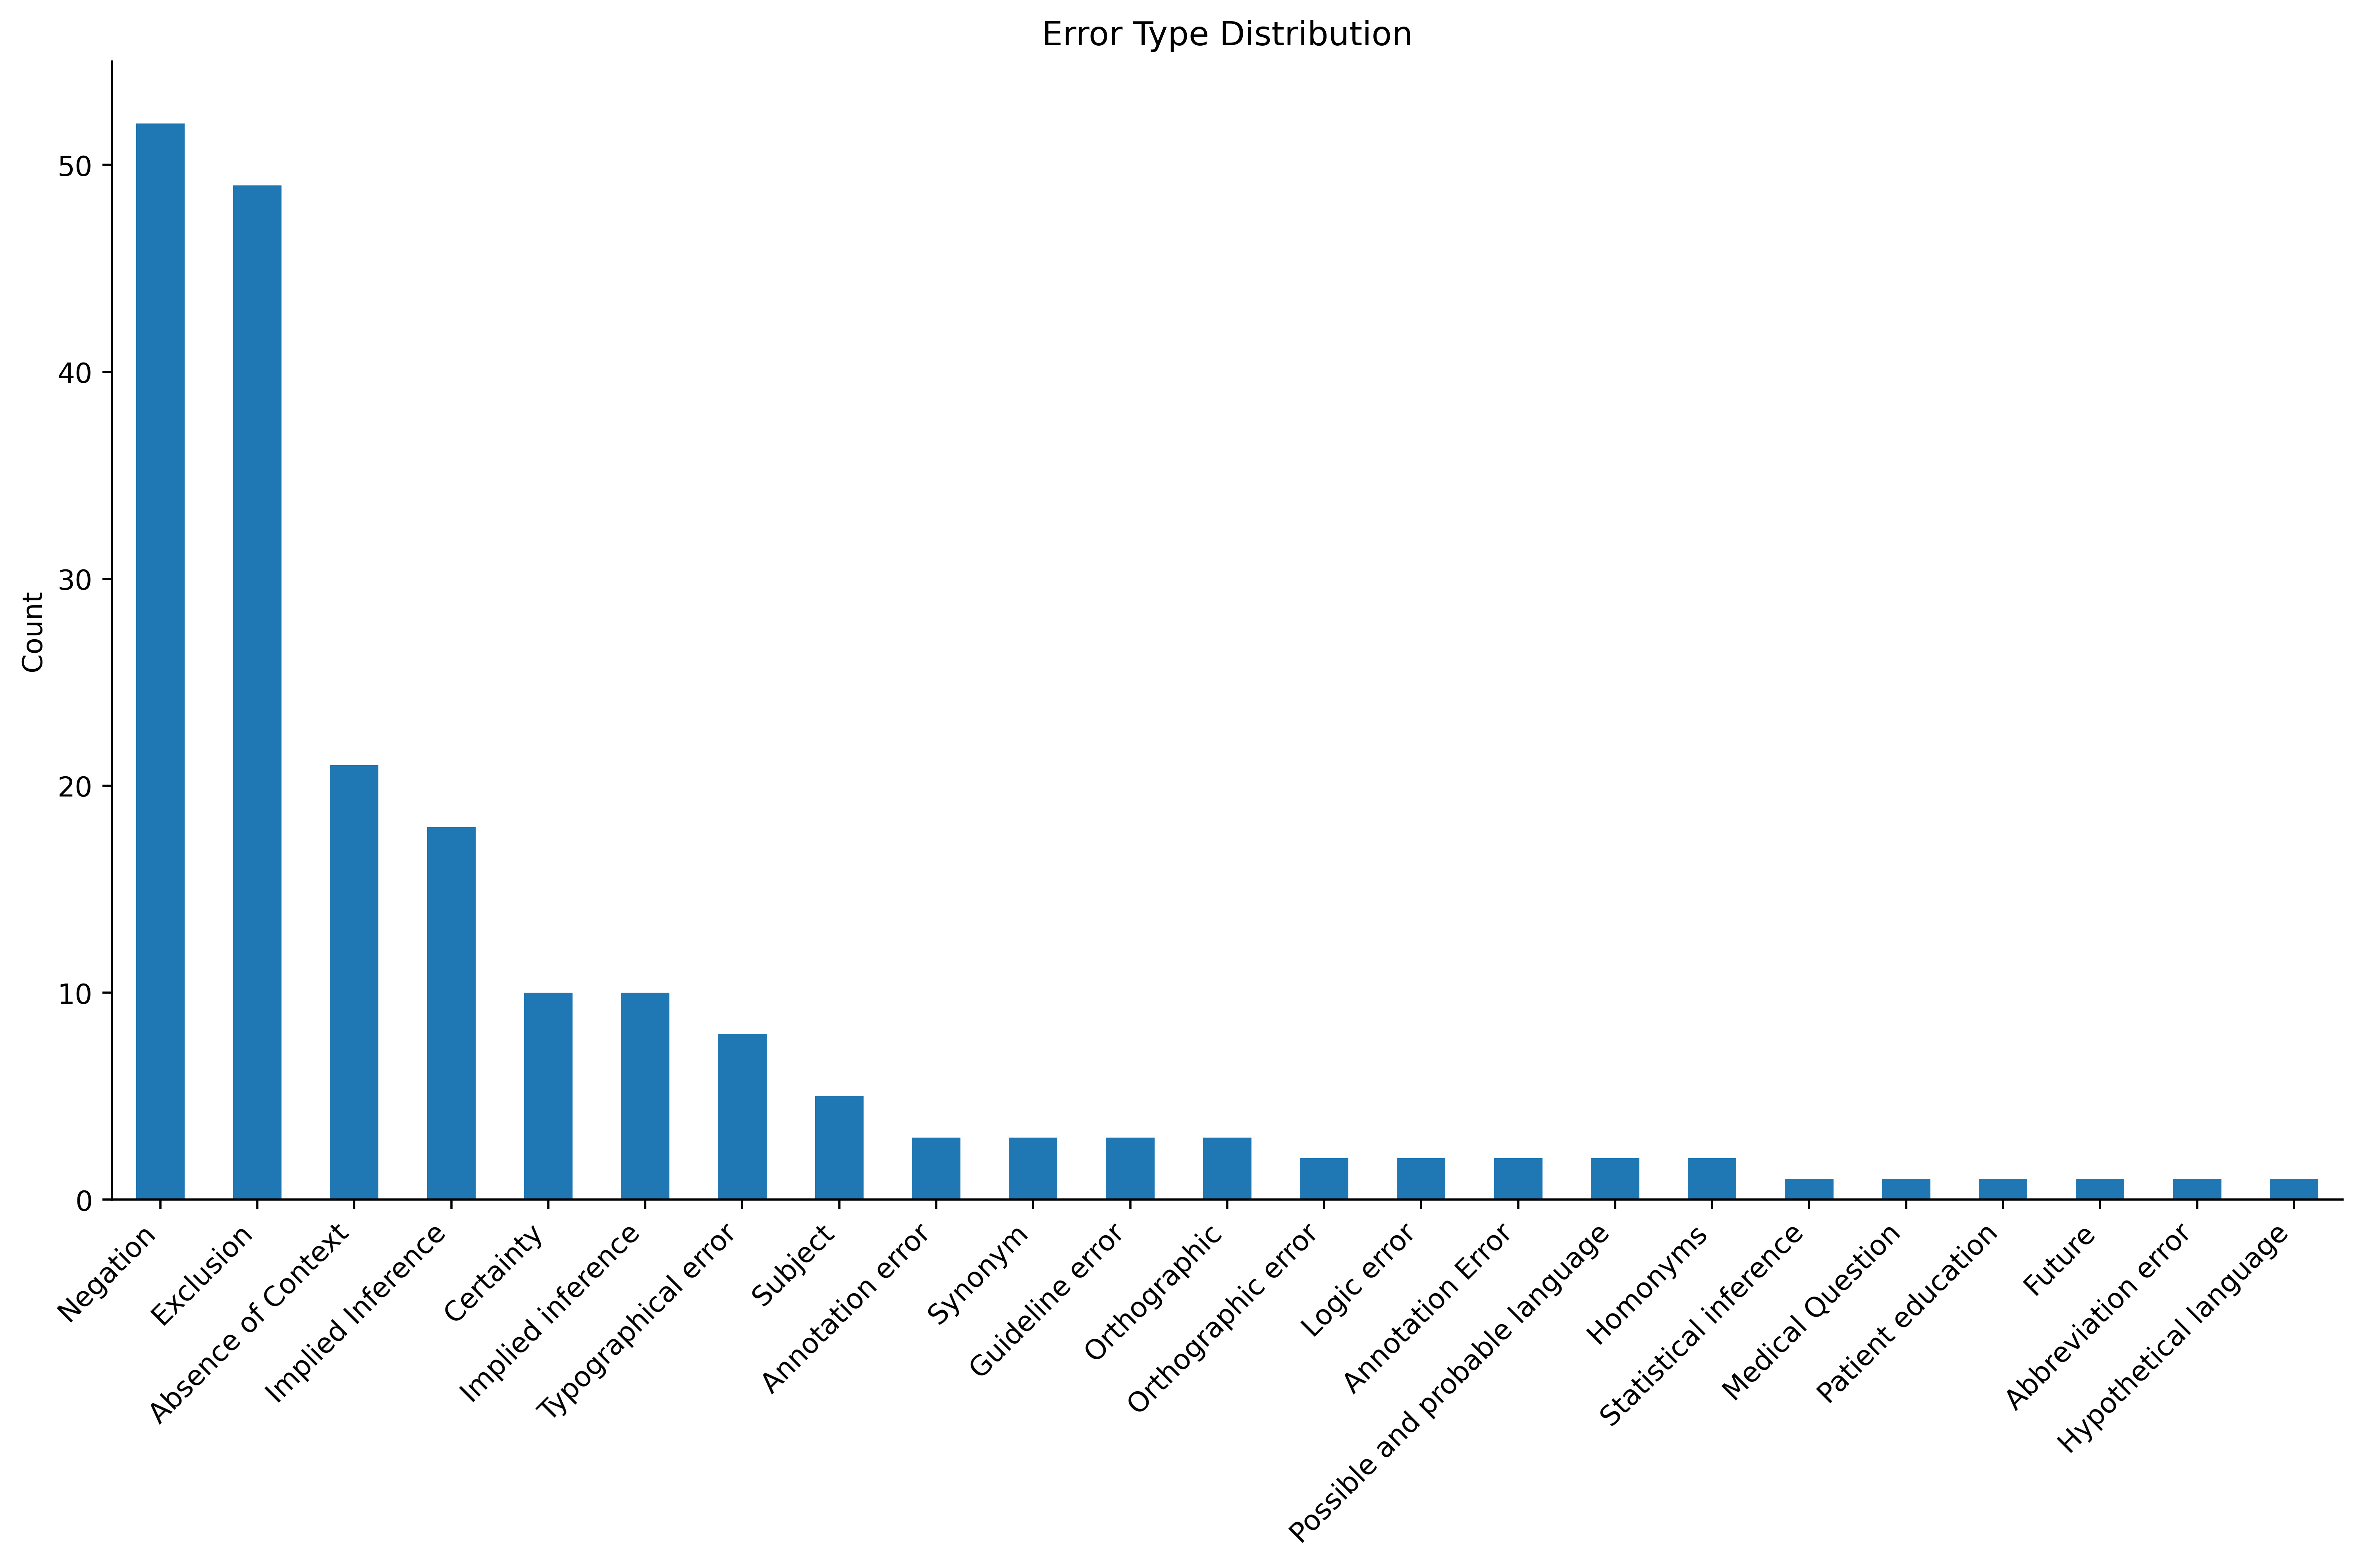

Gold_Standard
Negation                          25.870647
Exclusion                         24.378109
Absence of Context                10.447761
Implied Inference                  8.955224
Certainty                          4.975124
Implied inference                  4.975124
Typographical error                3.980100
Subject                            2.487562
Annotation error                   1.492537
Synonym                            1.492537
Guideline error                    1.492537
Orthographic                       1.492537
Orthographic error                 0.995025
Logic error                        0.995025
Annotation Error                   0.995025
Possible and probable language     0.995025
Homonyms                           0.995025
Statistical inference              0.497512
Medical Question                   0.497512
Patient education                  0.497512
Future                             0.497512
Abbreviation error                 0.497512
Hypothetical langu

In [73]:
# Plot (embed text as text in PDF, not vectors)
plt.rcParams["pdf.fonttype"] = 42
gold_standard_distribution = df["Gold_Standard"].value_counts()
plt.figure(figsize=(12, 8), dpi=500)
plt.rcParams["pdf.fonttype"] = 42
gold_standard_distribution.plot(kind="bar", color="#1f77b4")
plt.ylabel("Count")
plt.ylim(0, 55)
plt.xlabel("")
plt.xticks(rotation=45, ha="right")
plt.title("Error Type Distribution")
plt.tight_layout()
sns.despine()
plt.savefig("../reports/figures/error_type_distribution.pdf")
plt.show()

# Percentage distribution
percentage_distribution = df["Gold_Standard"].value_counts(normalize=True) * 100
print(percentage_distribution)
print(f"\nTotal number of records: {len(df)}")
print(f"Number of unique Gold_Standard categories: {df['Gold_Standard'].nunique()}")

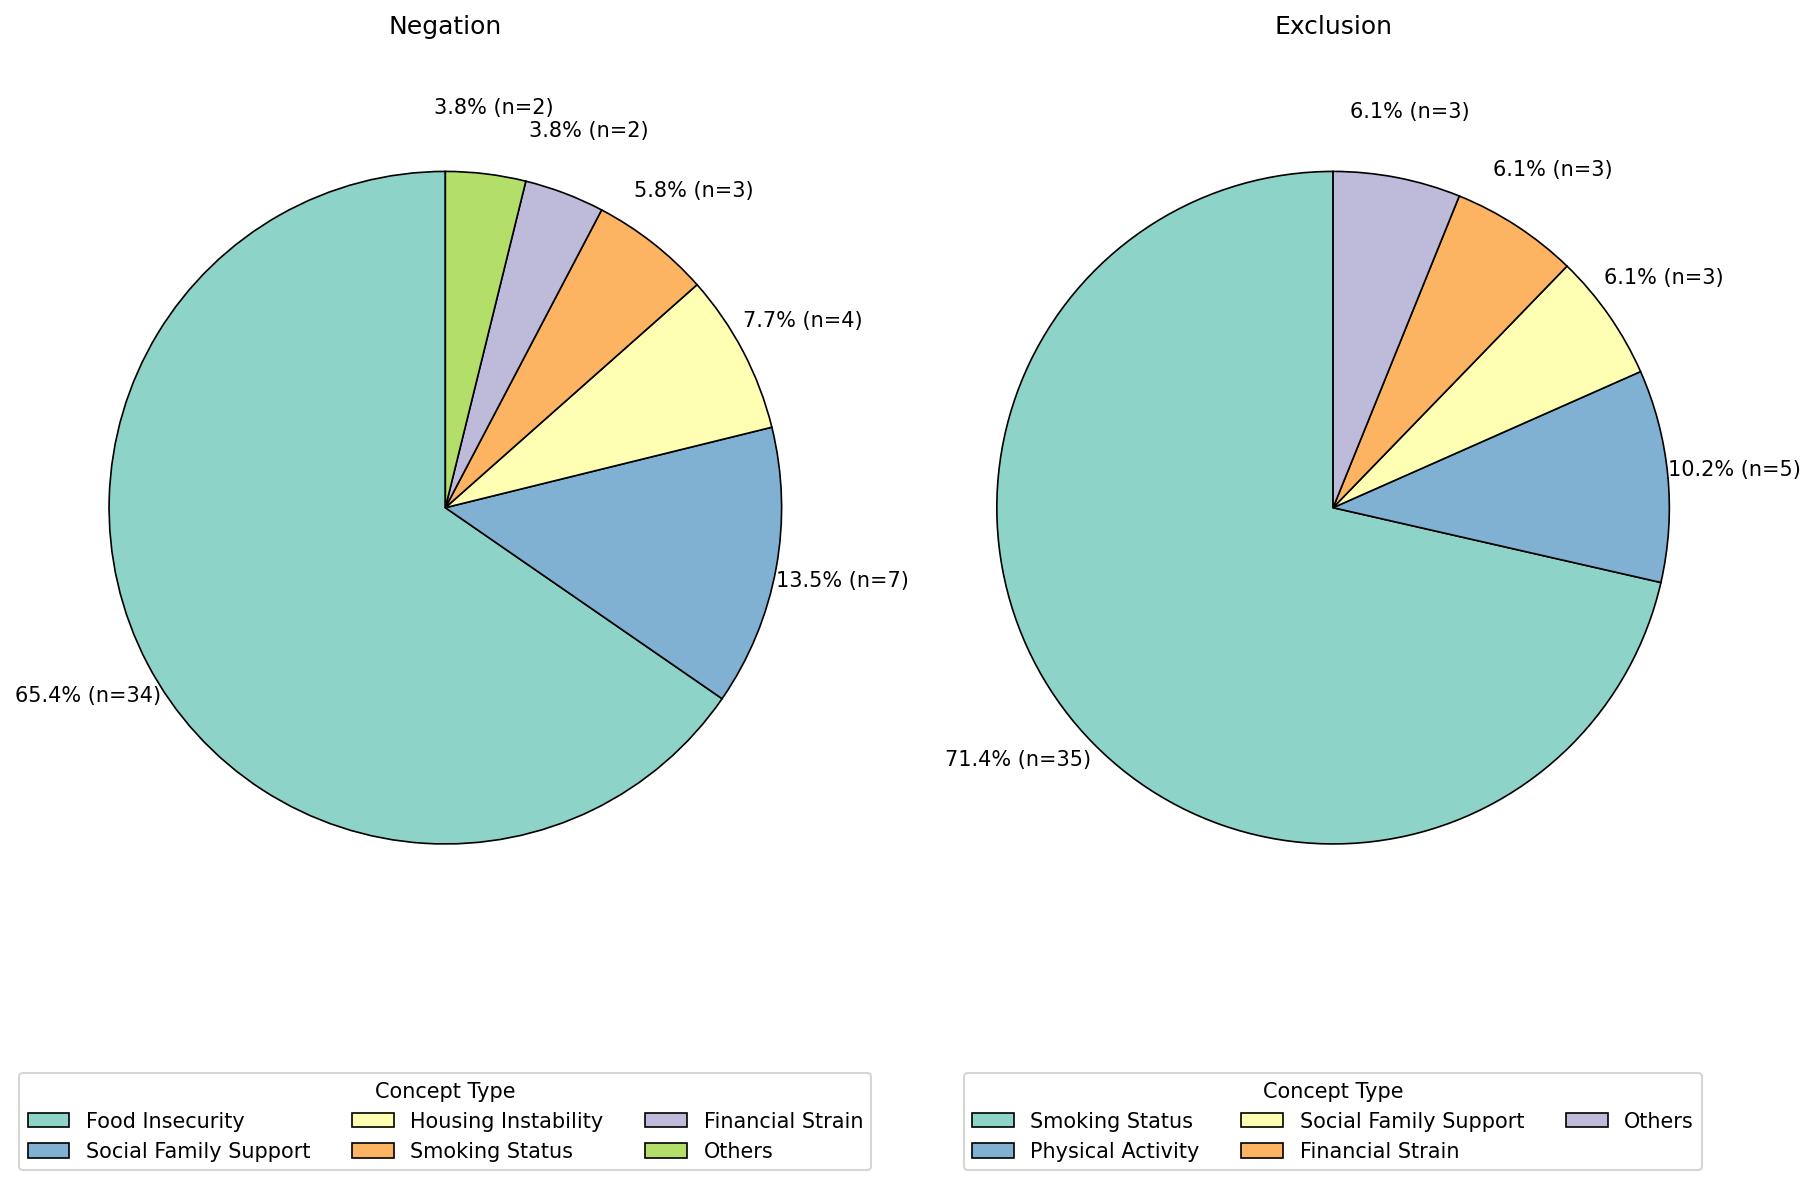

In [74]:
# Two pie charts: Negation and Exclusion (outline, less overlap, distinct 1st/2nd colors)
top2 = ["Negation", "Exclusion"]
fig, axes = plt.subplots(1, 2, figsize=(14, 8), dpi=150)
plt.rcParams["pdf.fonttype"] = 42
# Use color order so 1st and 2nd largest get contrasting Set3 colors (not adjacent)
set3_order = [0, 4, 1, 5, 2, 6, 3, 7, 8, 9, 10, 11]

for ax, gold in zip(axes, top2):
    subset = df[df["Gold_Standard"] == gold]
    counts = subset["Concept Type"].value_counts()
    total = counts.sum()
    threshold = 0.03 * total
    main = counts[counts >= threshold]
    others_sum = counts[counts < threshold].sum()
    if others_sum > 0:
        plot_counts = pd.concat([main, pd.Series({"Others": others_sum})])
    else:
        plot_counts = main
    n_slices = len(plot_counts)
    colors = [plt.cm.Set3(set3_order[i % 12] / 11) for i in range(n_slices)]
    plot_total = plot_counts.sum()

    def autopct_fn(pct):
        n = int(round(pct / 100 * plot_total))
        return f"{pct:.1f}% (n={n})"

    wedges, _, autotexts = ax.pie(
        plot_counts,
        labels=None,
        colors=colors,
        autopct=autopct_fn,
        startangle=90,
        pctdistance=1.2,
        wedgeprops={"edgecolor": "black", "linewidth": 0.8},
    )
    ax.legend(wedges, plot_counts.index, title="Concept Type", 
              bbox_to_anchor=(0.5, -0.1), loc="upper center", ncol=3)
    ax.set_title(gold)
    ax.axis("equal")
    
plt.savefig("../reports/figures/error_pie_chart.pdf")
# plt.tight_layout()
plt.show()

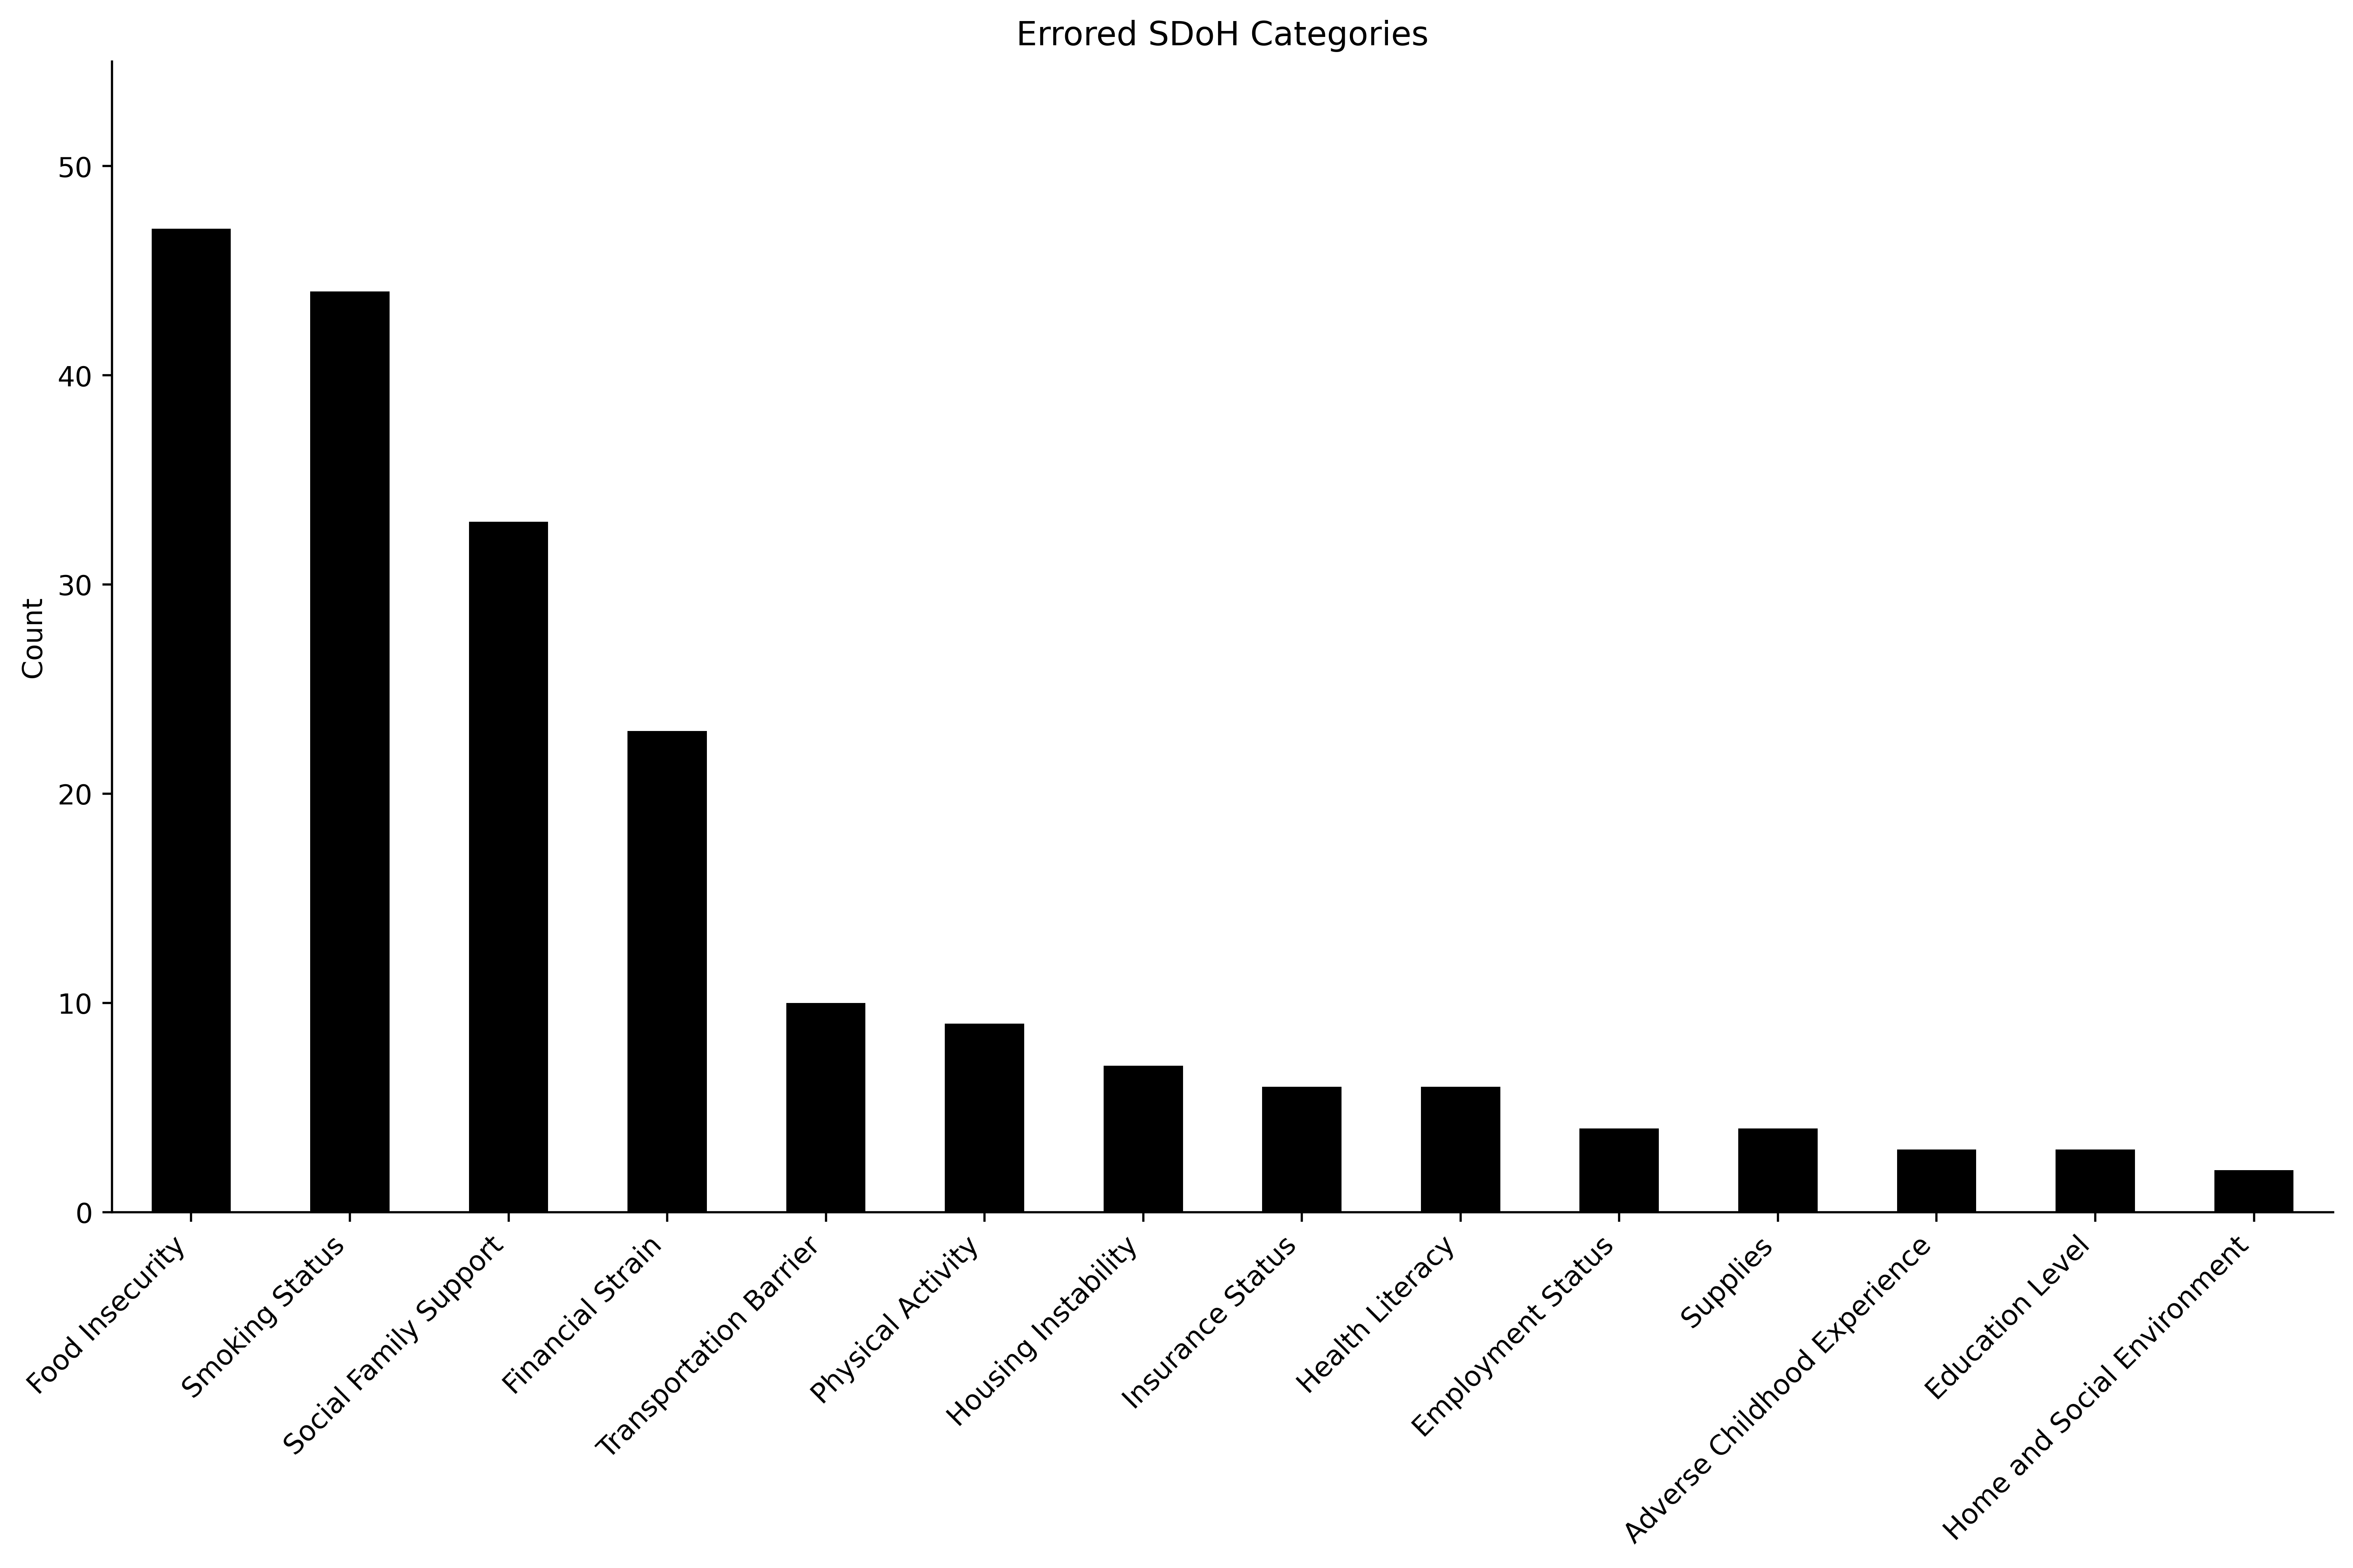

In [75]:
# Plot
error_distribution = df["Concept Type"].value_counts()
plt.rcParams["pdf.fonttype"] = 42
plt.figure(figsize=(12, 8), dpi=500)
error_distribution.plot(kind="bar", color='k')
plt.title("Errored SDoH Categories")
plt.ylabel("Count")
plt.ylim(0, 55)
plt.xlabel("")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
sns.despine()
plt.savefig("../reports/figures/sdoh_error_distribution.pdf")